In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input, Dense,Conv2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers


In [48]:
data= pd.read_csv('mnist_784_csv.csv')

In [53]:
labels = data.iloc[:, 0].values  # Extract labels
images = data.iloc[:, 1:].values / 255.0  # Normalize pixel values between 0 and 1
images = images.reshape(-1, 28, 28, 1)

In [54]:
noise_factor = 0.5
noisy_images = images + noise_factor* np.random.normal(loc=0.0,scale=1.0,size=images.shape)
noisy_images=np.clip(noisy_images,0.0,1.0)

In [57]:
x_train,x_test,y_train,y_test= train_test_split(noisy_images,images,test_size=0.2,random_state=42)
input_img= Input(shape=(28,28,1))

In [60]:
#encoder
x=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x= MaxPooling2D((2,2), padding='same')(x)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
x= MaxPooling2D((2,2), padding='same')(x)

In [61]:
#decoder
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
x= UpSampling2D((2,2))(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
x= UpSampling2D((2,2))(x)
decoded= Conv2D(1,(3,3),activation='sigmoid', padding='same')(x) 

In [62]:
#compile the model
autoencoder= Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [64]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=128,validation_data=(x_test,x_test))

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - loss: 0.5553 - val_loss: 0.4906
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - loss: 0.4871 - val_loss: 0.4764
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - loss: 0.4717 - val_loss: 0.4620
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.4602 - val_loss: 0.4546
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: 0.4535 - val_loss: 0.4498
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 69ms/step - loss: 0.4489 - val_loss: 0.4463
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 30s 68ms/step - loss: 0.4458 - val_loss: 0.4440
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - loss: 0.4433 - val_loss: 0.4418
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - loss: 0.4415 - val_loss: 0.4403
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 66ms/step - loss: 0.4398 - val_loss: 0.4389


In [65]:
dnoised_images= autoencoder.predict(x_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


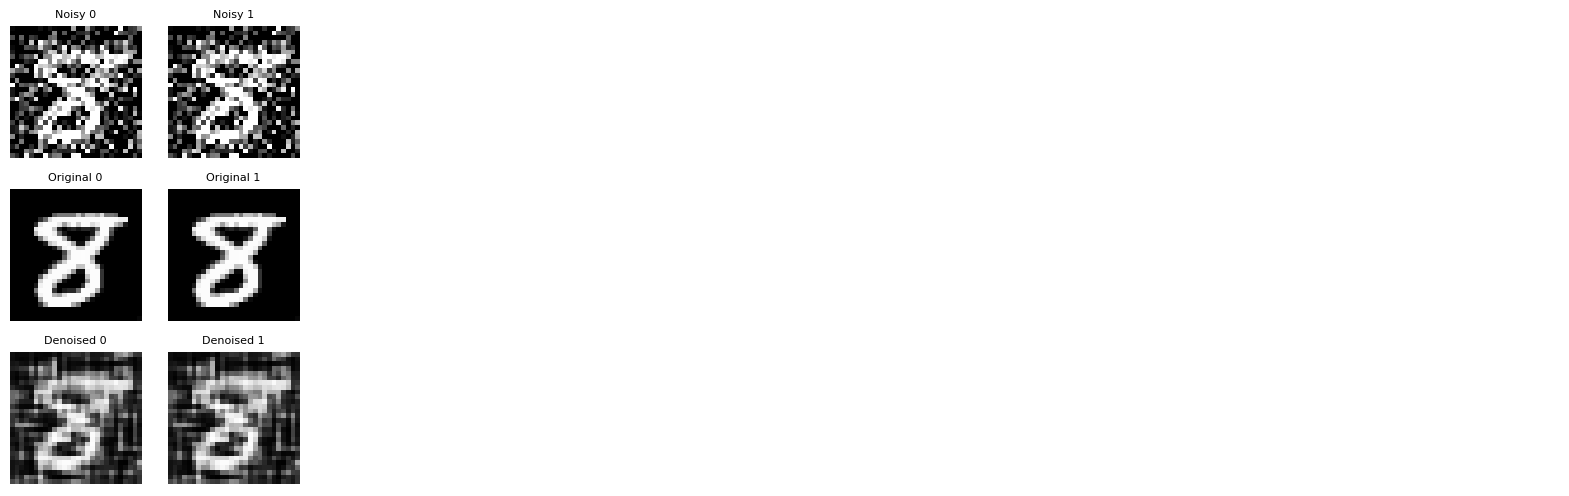

In [72]:
fig, axs = plt.subplots(3, 10, figsize=(20, 6))

for digit in range(10):
    idx = np.where(y_test == digit)[0]
    if idx.size > 0:  # If digit exists
        idx = idx[0]
        imgs = [x_test[idx].reshape(28, 28), y_test[idx].reshape(28, 28), autoencoder.predict(x_test[idx].reshape(1, 28, 28, 1)).reshape(28, 28)]
        titles = ["Noisy", "Original", "Denoised"]
        
        for ax, img, title in zip(axs[:, digit], imgs, titles):
            ax.imshow(img, cmap='gray')
            ax.set_title(f"{title} {digit}", fontsize=8)
            ax.axis('off')  # Turn off the axes for each image
    else:
        # If no image for this digit, turn off all axes in the column
        for ax in axs[:, digit]:
            ax.axis('off')

plt.show()